In [1]:
pip install fastf1

     ---------------------------------------- 0.0/109.0 kB ? eta -:--:--
     -------------------------------------- 109.0/109.0 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/148.4 kB ? eta -:--:--
   ---------------------------------------- 148.4/148.4 kB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 10.7 MB/s eta 0:00:01
   ---- ----------------------------------- 0.8/8.1 MB 10.8 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/8.1 MB 12.6 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.1 MB 10.9 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.1 MB 11.2 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/8.1 MB 11.3 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 10.8 MB/s eta 0:00:01
   ------------------ --------------------- 3.8/8.1 MB 10.9 MB/s eta 0:00:01
   --------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\CSMKSAWA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install git+https://github.com/theOehrly/Fast-F1.git


  Cloning https://github.com/theOehrly/Fast-F1.git to c:\users\csmksawa\appdata\local\temp\pip-req-build-4aehvblj
  Resolved https://github.com/theOehrly/Fast-F1.git to commit c5c7a98a24178062443b44dbd4a87f0ddbac1c2f
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/theOehrly/Fast-F1.git 'C:\Users\CSMKSAWA\AppData\Local\Temp\pip-req-build-4aehvblj'

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\CSMKSAWA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import os
import fastf1

os.makedirs('./cache', exist_ok=True)  # ✅ Create the cache folder if it doesn't exist
fastf1.Cache.enable_cache('./cache')   # ✅ Now FastF1 can use it

In [4]:
import fastf1
fastf1.Cache.enable_cache('./cache')  # Set a local directory for cache


In [5]:
session = fastf1.get_session(2024, 'Silverstone', 'Q')  # British GP Qualifying
session.load()
print(session.results)

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

   DriverNumber BroadcastName Abbreviation         DriverId         TeamName  \
63           63     G RUSSELL          RUS          russell         Mercedes   
44           44    L HAMILTON          HAM         hamilton         Mercedes   
4             4      L NORRIS          NOR           norris          McLaren   
1             1  M VERSTAPPEN          VER   max_verstappen  Red Bull Racing   
81           81     O PIASTRI          PIA          piastri          McLaren   
27           27  N HULKENBERG          HUL       hulkenberg     Haas F1 Team   
55           55       C SAINZ          SAI            sainz          Ferrari   
18           18      L STROLL          STR           stroll     Aston Martin   
23           23       A ALBON          ALB            albon         Williams   
14           14      F ALONSO          ALO           alonso     Aston Martin   
16           16     C LECLERC          LEC          leclerc          Ferrari   
2             2    L SARGEANT          S

In [6]:
from fastf1 import plotting
import pandas as pd

os.makedirs('./cache', exist_ok=True)
fastf1.Cache.enable_cache('./cache')

# Load session
session = fastf1.get_session(2024, 'Silverstone', 'R')  # Race session
session.load()

# Get results
results = session.results

data = []
for _, row in results.iterrows():
    data.append({
        'driver': row['FullName'],        # Use full driver name
        'team': row['TeamName'],
        'grid_pos': row['GridPosition'],
        'finish_pos': row['Position'],
        'points': row['Points'],
        'status': row['Status'],
        'winner': 1 if row['Position'] == 1 else 0
    })

df = pd.DataFrame(data)
print(df.head())

df['winner'] = (df['finish_pos'] == 1).astype(int)
print(df.head())


core           INFO 	Loading data for British Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

           driver             team  grid_pos  finish_pos  points    status  \
0  Lewis Hamilton         Mercedes       2.0         1.0    25.0  Finished   
1  Max Verstappen  Red Bull Racing       4.0         2.0    18.0  Finished   
2    Lando Norris          McLaren       3.0         3.0    15.0  Finished   
3   Oscar Piastri          McLaren       5.0         4.0    12.0  Finished   
4    Carlos Sainz          Ferrari       7.0         5.0    11.0  Finished   

   winner  
0       1  
1       0  
2       0  
3       0  
4       0  
           driver             team  grid_pos  finish_pos  points    status  \
0  Lewis Hamilton         Mercedes       2.0         1.0    25.0  Finished   
1  Max Verstappen  Red Bull Racing       4.0         2.0    18.0  Finished   
2    Lando Norris          McLaren       3.0         3.0    15.0  Finished   
3   Oscar Piastri          McLaren       5.0         4.0    12.0  Finished   
4    Carlos Sainz          Ferrari       7.0         5.0    11.0  Fin

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le_driver = LabelEncoder()
df['driver_encoded'] = le_driver.fit_transform(df['driver'])

le_team = LabelEncoder()
df['team_encoded'] = le_team.fit_transform(df['team'])

X = df[['grid_pos', 'team_encoded', 'driver_encoded']]
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print(f"Accuracy: {acc:.2f}")


Accuracy: 1.00


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

[[6]]


C:\Users\CSMKSAWA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


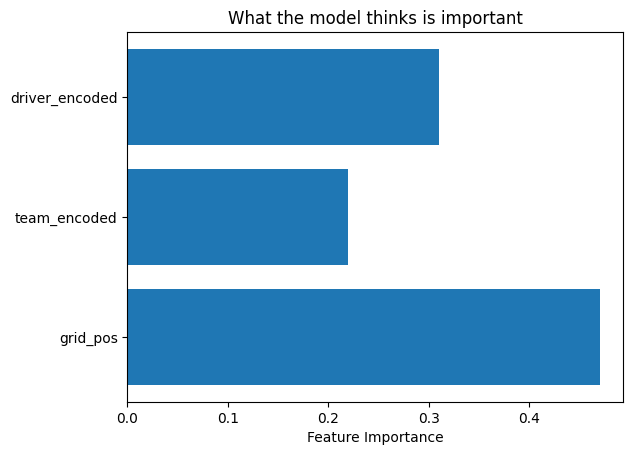

In [9]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("What the model thinks is important")
plt.show()


In [10]:
# prompt: # Assume `df_predict` contains latest driver grid data

# Assuming df_predict has the same structure as X (grid_pos, team_encoded, driver_encoded)
# before fitting the LabelEncoders.
# You'll need to apply the *same* LabelEncoders fitted on the training data to df_predict.

# Example df_predict structure (you would load this from your actual data source)
# Make sure to create team_encoded and driver_encoded columns in df_predict
# using the le_team and le_driver objects that were fitted on the training data (df).
df_predict = pd.DataFrame({
    'grid_pos': [1, 2, 3, 4, 5],
    'driver': ['Max Verstappen', 'Lando Norris', 'Lewis Hamilton', 'Carlos Sainz', 'Sergio Perez'],
    'team': ['Red Bull Racing', 'McLaren', 'Mercedes', 'Ferrari', 'Red Bull Racing']
})

# Apply the previously fitted LabelEncoders to df_predict
# Ensure that all drivers and teams in df_predict were present in the training data
# If not, you might need to handle unseen values (e.g., use a different strategy or add them to training data)
df_predict['driver_encoded'] = le_driver.transform(df_predict['driver'])
df_predict['team_encoded'] = le_team.transform(df_predict['team'])

# Select the features for prediction
X_predict = df_predict[['grid_pos', 'team_encoded', 'driver_encoded']]

# Make predictions on the new data
predictions = clf.predict(X_predict)

# Add the predictions to the df_predict DataFrame
df_predict['predicted_winner'] = predictions

print("\nPredictions on new data:")
print(df_predict)

# You can further analyze the predictions, e.g., filter for predicted winners
predicted_winners_df = df_predict[df_predict['predicted_winner'] == 1]
print("\nPredicted winners:")
predicted_winners_df



Predictions on new data:
   grid_pos          driver             team  driver_encoded  team_encoded  \
0         1  Max Verstappen  Red Bull Racing              13             8   
1         2    Lando Norris          McLaren              10             5   
2         3  Lewis Hamilton         Mercedes              11             6   
3         4    Carlos Sainz          Ferrari               1             2   
4         5    Sergio Perez  Red Bull Racing              17             8   

   predicted_winner  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

Predicted winners:


,grid_pos,driver,team,driver_encoded,team_encoded,predicted_winner


In [11]:
# Assume df_predict contains latest driver grid data, and it's properly encoded
X_predict = df_predict[['grid_pos', 'team_encoded', 'driver_encoded']]

# Predict probability of being the winner (class 1)
pred_probs = clf.predict_proba(X_predict)[:, 0]

# Add to DataFrame
df_predict['win_probability'] = pred_probs

# Sort and display
df_predict.sort_values(by='win_probability', ascending=False, inplace=True)
print(df_predict[['driver', 'team', 'grid_pos', 'win_probability']])


           driver             team  grid_pos  win_probability
3    Carlos Sainz          Ferrari         4             0.96
1    Lando Norris          McLaren         2             0.82
4    Sergio Perez  Red Bull Racing         5             0.77
0  Max Verstappen  Red Bull Racing         1             0.69
2  Lewis Hamilton         Mercedes         3             0.51


In [12]:
import joblib
joblib.dump(clf, 'f1_winner_model.pkl')


['f1_winner_model.pkl']

In [13]:
clf = joblib.load('f1_winner_model.pkl')

In [14]:
predicted_winner = df_predict.loc[df_predict['win_probability'].idxmax()]
print("🏁 Predicted Winner:")
print(f"Driver: {predicted_winner['driver']}")
print(f"Team: {predicted_winner['team']}")
print(f"Grid Position: {predicted_winner['grid_pos']}")
print(f"Win Probability: {predicted_winner['win_probability']:.4f}")


🏁 Predicted Winner:
Driver: Carlos Sainz
Team: Ferrari
Grid Position: 4
Win Probability: 0.9600


In [15]:
print("🥇 Top 3 Predicted Finishers:")
print(df_predict[['driver', 'team', 'grid_pos', 'win_probability']].head(3))


🥇 Top 3 Predicted Finishers:
         driver             team  grid_pos  win_probability
3  Carlos Sainz          Ferrari         4             0.96
1  Lando Norris          McLaren         2             0.82
4  Sergio Perez  Red Bull Racing         5             0.77


core           INFO 	Loading data for British Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '55', '27', '18', '14', '23', '22', '2', '20', '3', '16', '77', '31', '11', '24', '63', '10']


Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6

Confusion Matrix:
[[5 0]
 [1 0]]


C:\Users\CSMKSAWA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\CSMKSAWA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\CSMKSAWA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metr

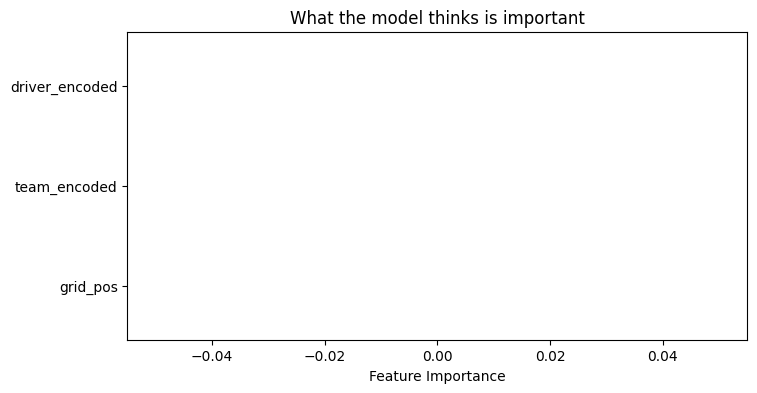


Predictions on new data:
   grid_pos          driver             team  driver_encoded  team_encoded  \
0         1  Max Verstappen  Red Bull Racing              13             8   
1         2    Lando Norris          McLaren              10             5   
2         3  Lewis Hamilton         Mercedes              11             6   
3         4    Carlos Sainz          Ferrari               1             2   
4         5    Sergio Perez  Red Bull Racing              17             8   

   predicted_winner  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

Predicted winners:
Empty DataFrame
Columns: [grid_pos, driver, team, driver_encoded, team_encoded, predicted_winner]
Index: []


IndexError: index 1 is out of bounds for axis 1 with size 1

In [16]:
# prompt: Save this to my projects

import os
import fastf1
from fastf1 import plotting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib

# Install fastf1 if not already installed
try:
    import fastf1
except ImportError:
    !pip install fastf1
    !pip install git+https://github.com/theOehrly/Fast-F1.git
    import fastf1


os.makedirs('./cache', exist_ok=True)  # Create the cache folder if it doesn't exist
fastf1.Cache.enable_cache('./cache')  # Now FastF1 can use it

# Load session for Qualifying (for example)
# session = fastf1.get_session(2024, 'Silverstone', 'Q')  # British GP Qualifying
# session.load()
# print(session.results)

# Load session for Race
session = fastf1.get_session(2024, 'Silverstone', 'R')  # Race session
session.load()

# Get results
results = session.results

data = []
for _, row in results.iterrows():
    data.append({
        'driver': row['FullName'],
        'team': row['TeamName'],
        'grid_pos': row['GridPosition'],
        'finish_pos': row['Position'],
        'points': row['Points'],
        'status': row['Status'],
        'winner': 1 if row['Position'] == 1 else 0
    })

df = pd.DataFrame(data)
# print(df.head()) # Uncomment to print head

df['winner'] = (df['finish_pos'] == 1).astype(int)
# print(df.head()) # Uncomment to print head

# Encode categorical columns
le_driver = LabelEncoder()
df['driver_encoded'] = le_driver.fit_transform(df['driver'])

le_team = LabelEncoder()
df['team_encoded'] = le_team.fit_transform(df['team'])

X = df[['grid_pos', 'team_encoded', 'driver_encoded']]
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Added random_state for reproducibility

clf = RandomForestClassifier(random_state=42) # Added random_state
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print(f"Accuracy: {acc:.2f}")

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 4)) # Added figure size
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("What the model thinks is important")
plt.show()

# --- Prediction on New Data (Example) ---
# Assuming df_predict has the same structure as X (grid_pos, driver, team)
# before fitting the LabelEncoders.
# You'll need to apply the *same* LabelEncoders fitted on the training data to df_predict.

# Example df_predict structure (you would load this from your actual data source)
# Make sure to create team_encoded and driver_encoded columns in df_predict
# using the le_team and le_driver objects that were fitted on the training data (df).
# This example uses hypothetical data for prediction.
df_predict = pd.DataFrame({
    'grid_pos': [1, 2, 3, 4, 5],
    'driver': ['Max Verstappen', 'Lando Norris', 'Lewis Hamilton', 'Carlos Sainz', 'Sergio Perez'],
    'team': ['Red Bull Racing', 'McLaren', 'Mercedes', 'Ferrari', 'Red Bull Racing']
})

# Apply the previously fitted LabelEncoders to df_predict
# Ensure that all drivers and teams in df_predict were present in the training data
# If not, you might need to handle unseen values (e.g., use a different strategy or add them to training data)
# Using .loc to avoid SettingWithCopyWarning
df_predict.loc[:, 'driver_encoded'] = le_driver.transform(df_predict['driver'])
df_predict.loc[:, 'team_encoded'] = le_team.transform(df_predict['team'])


# Select the features for prediction
X_predict = df_predict[['grid_pos', 'team_encoded', 'driver_encoded']]

# Make predictions on the new data
predictions = clf.predict(X_predict)

# Add the predictions to the df_predict DataFrame
df_predict.loc[:, 'predicted_winner'] = predictions

print("\nPredictions on new data:")
print(df_predict)

# You can further analyze the predictions, e.g., filter for predicted winners
predicted_winners_df = df_predict[df_predict['predicted_winner'] == 1].copy() # Use .copy() to avoid SettingWithCopyWarning
print("\nPredicted winners:")
print(predicted_winners_df) # Use print to display the dataframe

# Predict probability of being the winner (class 1)
# Assuming the positive class (winner) is the second class in clf.classes_
# Check clf.classes_ if you're unsure. Usually 0 is the first class, 1 is the second.
pred_probs = clf.predict_proba(X_predict)[:, 1] # Get probabilities for the positive class (winner)

# Add to DataFrame
df_predict.loc[:, 'win_probability'] = pred_probs

# Sort and display
df_predict.sort_values(by='win_probability', ascending=False, inplace=True)
print("\nRace Winner Probabilities:")
print(df_predict[['driver', 'team', 'grid_pos', 'win_probability']])

# Save the model
joblib.dump(clf, 'f1_winner_model.pkl')
print("\nModel saved as f1_winner_model.pkl")

# Load the model (optional, just for demonstration)
# clf_loaded = joblib.load('f1_winner_model.pkl')
# print("\nModel loaded successfully.")

# Predict the most likely winner and top 3 based on probability
if not df_predict.empty:
    predicted_winner = df_predict.iloc[0] # Get the first row after sorting by probability
    print("\n🏁 Predicted Winner:")
    print(f"Driver: {predicted_winner['driver']}")
    print(f"Team: {predicted_winner['team']}")
    print(f"Grid Position: {predicted_winner['grid_pos']}")
    print(f"Win Probability: {predicted_winner['win_probability']:.4f}")

    print("\n🥇 Top 3 Predicted Finishers (by Win Probability):")
    print(df_predict[['driver', 'team', 'grid_pos', 'win_probability']].head(3))
else:
    print("\nNo predictions to display.")
